In [1]:
import torch
from torchvision import transforms, datasets
from torchvision.utils import make_grid
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def view_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [3]:
path = 'C:/Users/user/Desktop/JS/dataloader_test/'

# cumstom data loader class

In [4]:
class ImageDataset(Dataset):
    # data set read
    def read_data_set(self):

        all_img_files = []
        all_labels = []

        class_names = os.walk(self.data_set_path).__next__()[1]

        for index, class_name in enumerate(class_names):
            label = index
            img_dir = os.path.join(self.data_set_path, class_name)
            img_files = os.walk(img_dir).__next__()[2]

            for img_file in img_files:
                img_file = os.path.join(img_dir, img_file)
                img = Image.open(img_file)
                if img is not None:
                    all_img_files.append(img_file)
                    all_labels.append(label)

        return all_img_files, all_labels, len(all_img_files), len(class_names), class_names

    def __init__(self, data_set_path, transforms=None):
        self.data_set_path = data_set_path
        self.image_files_path, self.labels, self.length, self.num_classes, self.class_names = self.read_data_set()
        self.transforms = transforms

    def __getitem__(self, index):
        image = Image.open(self.image_files_path[index])
        image = image.convert("RGB")

        if self.transforms is not None:
            image = self.transforms(image)

        return image, self.labels[index], self.class_names

    def __len__(self):
        return self.length

In [5]:
trans=transforms.Compose([transforms.Resize((200,200)),
                          transforms.ToTensor()])
data_class=ImageDataset(path, transforms=trans)
data_class_set=torch.utils.data.DataLoader(data_class, batch_size=10, shuffle=True )

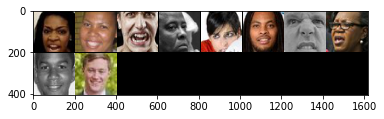

surprise happy angry   sad  fear happy disguset angry neutral happy 


In [6]:
data_loader = iter(data_class_set)
img, label, class_name = data_loader.next()
view_image(make_grid(img))
print("".join("%5s "%data_class.class_names[label[j]] for j in range(10)))

# ImageFolder

In [7]:
trans_f=transforms.Compose([transforms.Resize((200,200)),
                            transforms.ToTensor()])
data_class_f=datasets.ImageFolder(path, transform=trans_f)
data_class_set_f=DataLoader(data_class_f, batch_size=10, shuffle=True )

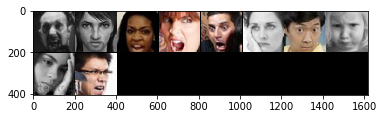

angry neutral surprise angry  fear neutral surprise disguset   sad angry 


In [8]:
data_loader = iter(data_class_set_f)
img, label = data_loader.next()
view_image(make_grid(img))
print("".join("%5s "%data_class_f.classes[label[j]] for j in range(10)))